In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [2]:
import tensorflow as tf
import numpy as np
from model import _process_frame, FFPolicy
import matplotlib.pyplot as plt
%matplotlib inline

ale_module = tf.load_op_library('build/libaleop.so')
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)

In [3]:
observation = tf.Variable(np.zeros((42, 42)), trainable=False, name='state', dtype=tf.float32)

In [4]:
action = tf.Variable(initial_value=0, trainable=False, name='action', dtype=tf.int32)
reward, done, state = ale_module.ale(action, 'pong.bin', frameskip_min=4, frameskip_max=4)

In [24]:
obs = _process_frame(state)
pi = FFPolicy(obs, 4)

s_sample, value = pi.act()
action_assign = action.assign(tf.cast(tf.argmax(s_sample, axis=1)[0], tf.int32))
obs_assign = observation.assign(obs[0, :, :, 0])

log_prob_tf = tf.nn.log_softmax(pi.logits)
prob_tf = tf.nn.softmax(pi.logits)

adv = 

pi_loss = - tf.reduce_sum(tf.reduce_sum(log_prob_tf * s_sample, [1]) * self.adv)

vf_loss = 0.5 * tf.reduce_sum(tf.square(pi.vf - reward))
entropy = - tf.reduce_sum(prob_tf * log_prob_tf)

bs = tf.to_float(tf.shape(pi.x)[0])
loss = pi_loss + 0.5 * vf_loss - entropy * 0.01
grads = tf.gradients(loss, pi.var_list)


step_op = tf.group(obs_assign, action_assign)


NameError: name 'self' is not defined

In [7]:
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
sess.run(tf.global_variables_initializer())

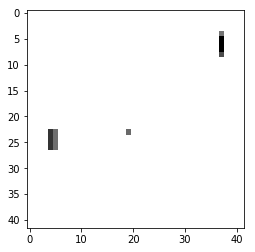

In [23]:
sess.run(step_op)
screen = sess.run(observation.value())
plt.imshow(screen, cmap=plt.cm.Greys)